# **Perceptron**

For this exercise, we will implement a simple Perceptron model from scratch using only NumPy for basic linear algebra operations. Below is the perceptron class, along with functions to visualize the decision boundary and accuracy over epochs.

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Random seed for reproducibility
np.random.seed(24)

# Perceptron Implementation
class Perceptron:
    def __init__(self, input_dim=2, learning_rate=0.01, max_epochs=100):
        self.w = np.zeros(input_dim)   # weights
        self.b = 0.0                   # bias
        self.lr = learning_rate
        self.max_epochs = max_epochs
        self.accuracy_history = []

    # Prediction function
    def predict(self, X):
        linear_output = np.dot(X, self.w) + self.b
        return np.where(linear_output >= 0, 1, -1)

    # Training function
    def fit(self, X, y):
        for epoch in range(self.max_epochs):
            errors = 0
            for xi, target in zip(X, y):
                pred = self.predict(xi)
                if pred != target: # Misclassification
                    update = self.lr * target
                    self.w += update * xi
                    self.b += update
                    errors += 1
            acc = self.evaluate(X, y)
            self.accuracy_history.append(acc)
            if errors == 0:
                break
    
    # Evaluation function
    def evaluate(self, X, y):
        predictions = self.predict(X)
        return np.mean(predictions == y)

# Utility functions
def plot_data(X, y, title="Data Distribution"):
    plt.figure(figsize=(6,6))
    plt.scatter(X[y==1,0], X[y==1,1], color="red", label="Class 0", alpha=0.6)
    plt.scatter(X[y==-1,0], X[y==-1,1], color="blue", label="Class 1", alpha=0.6)
    plt.legend()
    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.grid(True)
    plt.show()

# Decision boundary plotting
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    plt.figure(figsize=(6,6))
    plt.scatter(X[y==1,0], X[y==1,1], color="red", label="Class 0", alpha=0.6)
    plt.scatter(X[y==-1,0], X[y==-1,1], color="blue", label="Class 1", alpha=0.6)

    # Decision boundary
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx = np.linspace(x_min, x_max, 200)
    if model.w[1] != 0: 
        yy = -(model.w[0] * xx + model.b) / model.w[1]
        plt.plot(xx, yy, "k--", label="Decision boundary")

    # Highlight misclassified
    preds = model.predict(X)
    misclassified = X[preds != y]
    if len(misclassified) > 0:
        plt.scatter(misclassified[:,0], misclassified[:,1], 
                    facecolors='none', edgecolors='yellow', s=80, label="Misclassified")

    plt.legend()
    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.grid(True)
    plt.show()

# Accuracy over epochs plotting
def plot_accuracy(history, title="Accuracy over Epochs"):
    plt.figure()
    plt.plot(range(1, len(history)+1), history, marker="o")
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.show()

## **Exercise 1**

### **Data Generation Task**

First we're going to generate two classes of 2D data points (1000 samples per class) using multivariate normal distributions with the parameters that were given:

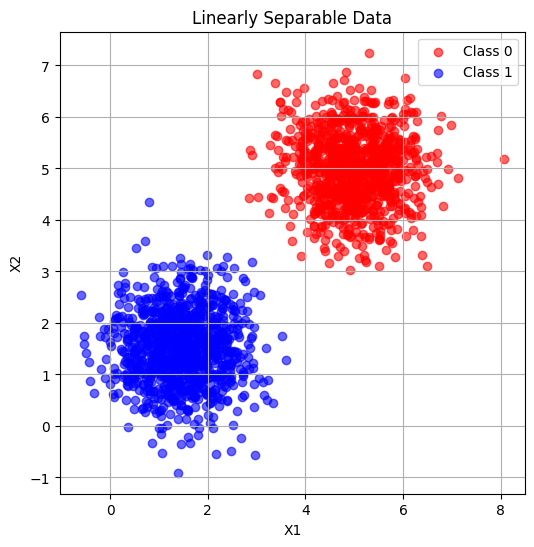

In [25]:
# Parameters for linearly separable data
mean0, cov0 = [1.5, 1.5], [[0.5, 0], [0, 0.5]]
mean1, cov1 = [5, 5], [[0.5, 0], [0, 0.5]]

# Generate linearly separable data
class0 = np.random.multivariate_normal(mean0, cov0, 1000)
class1 = np.random.multivariate_normal(mean1, cov1, 1000)

# Combine into dataset
X1 = np.vstack((class0, class1))
y1 = np.hstack((-1*np.ones(1000), np.ones(1000)))

plot_data(X1, y1, "Linearly Separable Data")

### **Perceptron Implementation Task**

Now, we're going to implement a single-layer perceptron from scratch to classify the generated data into the two classes, using NumPy only for basic linear algebra operations.

Final weights: [0.02109579 0.03614885]
Final bias: -0.20000000000000004
Final accuracy: 1.0


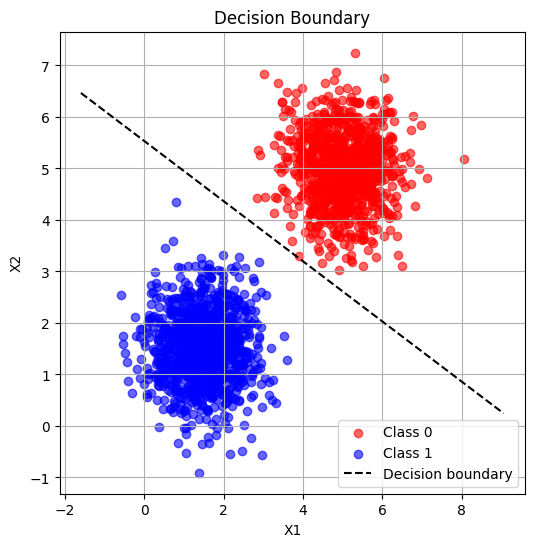

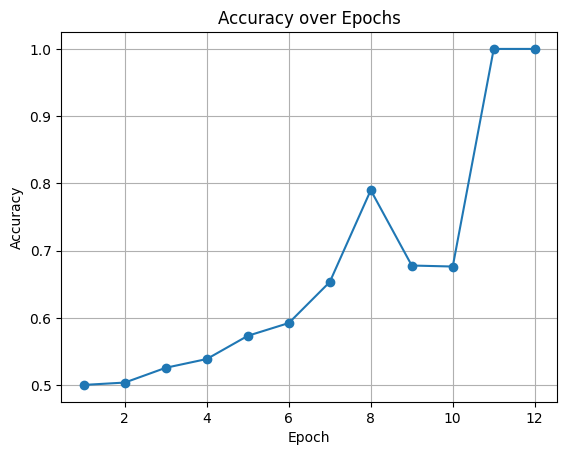

In [26]:
# Train Perceptron
perc1 = Perceptron(input_dim=2, learning_rate=0.01, max_epochs=100)
perc1.fit(X1, y1)

print("Final weights:", perc1.w)
print("Final bias:", perc1.b)
print("Final accuracy:", perc1.evaluate(X1, y1))

plot_decision_boundary(perc1, X1, y1, "Decision Boundary")
plot_accuracy(perc1.accuracy_history, "Accuracy over Epochs")

The data's separability leads to quick convergence because the two clusters are centered far apart with little overlap, which means a straight line can perfectly separate them. In such a situation, the perceptron learning rule rapidly adjusts the weights after only a few misclassifications, since each update moves the decision boundary closer to an exact separator. Once all points fall on the correct side, no more updates are needed, and the algorithm converges in very few epochs. This clean separation also explains why the model achieves 100% accuracy rather than oscillating or plateauing below it.

## **Exercise 2**

### **Data Generation Task**

Now, we'll generate two new classes of 2D data points (1000 samples per class) using multivariate normal distributions with the parameters that were given, which will create partial overlap between the classes:

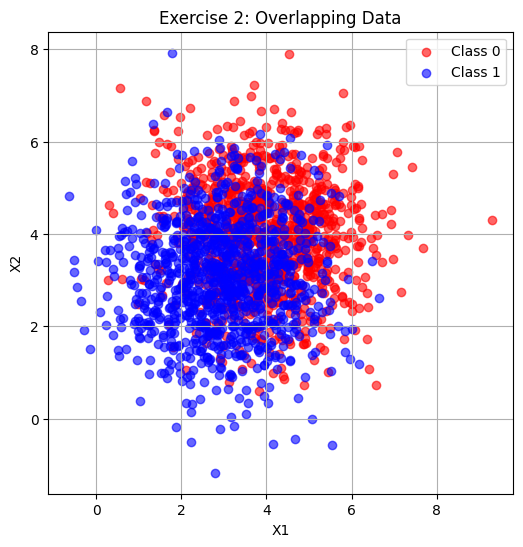

In [27]:
np.random.seed(24)
# Parameters for overlapping data
mean0, cov0 = [3, 3], [[1.5, 0], [0, 1.5]]
mean1, cov1 = [4, 4], [[1.5, 0], [0, 1.5]]

# Generate overlapping data
class0 = np.random.multivariate_normal(mean0, cov0, 1000)
class1 = np.random.multivariate_normal(mean1, cov1, 1000)

# Combine into dataset
X2 = np.vstack((class0, class1))
y2 = np.hstack((-1*np.ones(1000), np.ones(1000)))

plot_data(X2, y2, "Exercise 2: Overlapping Data")

### **Perceptron Implementation Task**

Best Run:
Final weights: [0.06944049 0.09727756]
Final bias: -0.20000000000000004
Final accuracy: 0.51


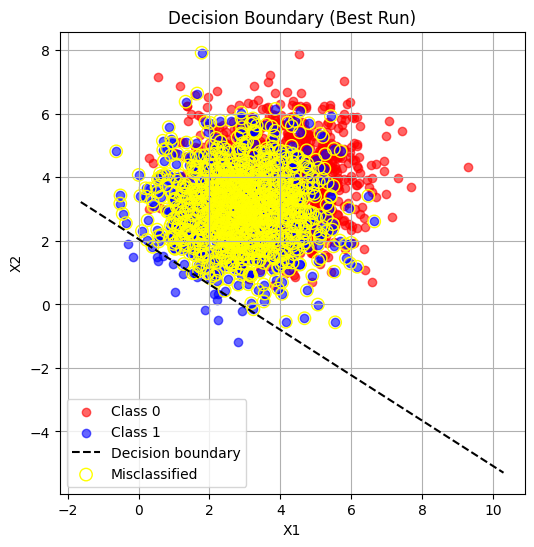

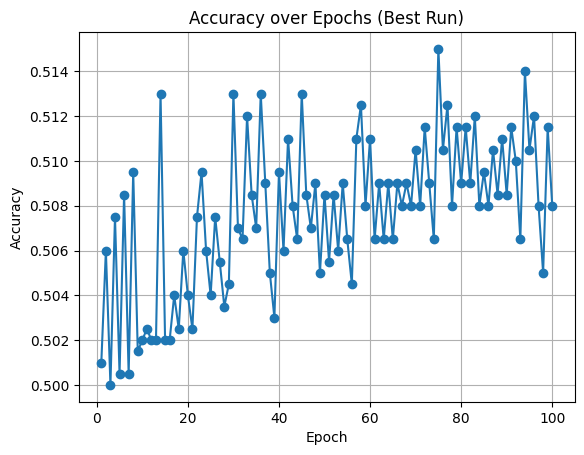

In [28]:
n_runs = 5
results = []

for i in range(n_runs):
    # Reinitialize and train a new perceptron each run
    perc = Perceptron(input_dim=2, learning_rate=0.01, max_epochs=100)
    perc.fit(X2, y2)
    
    final_acc = perc.evaluate(X2, y2)
    
    results.append((perc, final_acc))

# Select best run by highest final accuracy
best_run = max(results, key=lambda x: x[1])
best_perc, best_final_acc = best_run

print("Best Run:")
print("Final weights:", best_perc.w)
print("Final bias:", best_perc.b)
print(f"Final accuracy: {best_final_acc:.2f}")

# Plot decision boundary for best run
plot_decision_boundary(best_perc, X2, y2, "Decision Boundary (Best Run)")

# Plot accuracy history for best run
plot_accuracy(best_perc.accuracy_history, "Accuracy over Epochs (Best Run)")

Because the classes overlap, the perceptron cannot find a perfect linear separator. Unlike in Exercise 1, where convergence was guaranteed, here the updates never stabilize: correcting errors on one side inevitably creates misclassifications on the other. As a result, training does not converge, the accuracy hovers just above chance (around 50%), and many points remain incorrectly classified. This illustrates the perceptron’s fundamental limitation: it only guarantees convergence when the data is linearly separable.

## **AI Assistance**

I used AI (ChatGPT) to help with:
- Reviewing my code and outputs for clarity.
- Suggesting improvements to formatting and readability.

All code was executed, tested, and validated locally by me. Nothing was done with AI that I didn't understand.